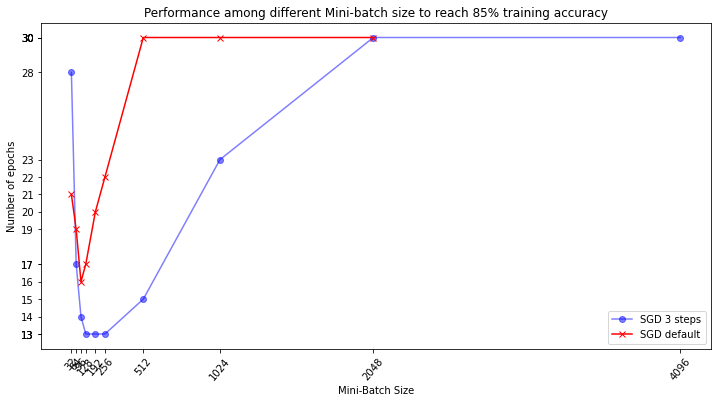

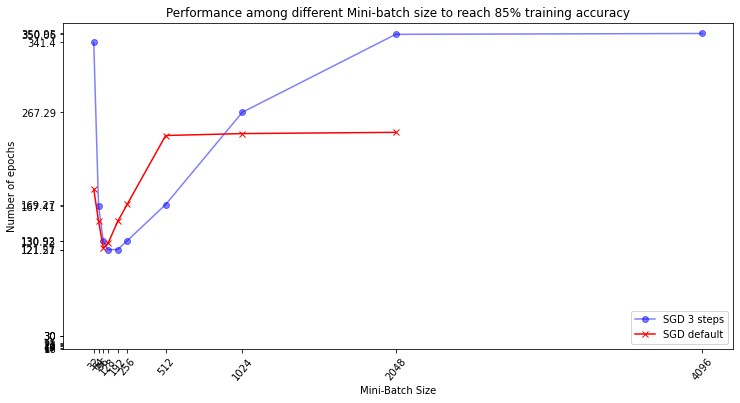

In [86]:
import os, json
import matplotlib.pyplot as plt

def load_performance(score_path):
    epochs = {}
    run_times = {}
    for root, dirs, files in os.walk(score_path):
        for file in files:
            if file.endswith('.json'):
                with open(root+file, 'r') as f:
                    data = json.load(f)
                    batch_size = data['batch_size']
                    n_epoch = len(data['train_losses'])
                    run_times[batch_size] = sum(data['run_time'])
                    epochs[batch_size] = n_epoch
    batch_sizes = sorted(list(epochs.keys()))
    n_epochs = [epochs[k] for k in batch_sizes]
    _run_time = [round(run_times[k], 2) for k in batch_sizes]
    return batch_sizes, n_epochs, _run_time

batch_sizes_3steps, n_epochs_3steps, _run_time = load_performance(score_path_1)

score_path_1 = "/home/tung5534/cnn_cifar/W08/optimal_batch_size/scores/E30T85_3STEPS/"
batch_sizes_3steps, n_epochs_3steps, run_time_3steps = load_performance(score_path_1)

score_path_2 = "/home/tung5534/cnn_cifar/W08/optimal_batch_size/scores/E30T85_1STEPS/"
batch_sizes_1steps, n_epochs_1steps, run_time_1steps = load_performance(score_path_2)

plt.figure(figsize=(12,6))
plt.plot(batch_sizes_3steps, n_epochs_3steps, marker='o', color='b', alpha=.5, label='SGD 3 steps')
plt.plot(batch_sizes_1steps, n_epochs_1steps, marker='x', color='r', alpha=1, label='SGD default')
plt.xlabel('Mini-Batch Size')
plt.xticks(batch_sizes_3steps, labels=batch_sizes_3steps, rotation=50)
plt.ylabel('Number of epochs')
y_tickslabel = n_epochs_3steps + n_epochs_1steps
plt.yticks(y_tickslabel, labels=y_tickslabel, rotation=0)
plt.title('Performance among different Mini-batch size to reach 85% training accuracy')
plt.legend(loc= 'lower right')
# plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(batch_sizes_3steps, run_time_3steps, marker='o', color='b', alpha=.5, label='SGD 3 steps')
plt.plot(batch_sizes_1steps, run_time_1steps, marker='x', color='r', alpha=1, label='SGD default')
plt.xlabel('Mini-Batch Size')
plt.xticks(batch_sizes_3steps, labels=batch_sizes_3steps, rotation=50)
plt.ylabel('Number of epochs')
y_tickslabel = run_time_3steps + n_epochs_1steps
plt.yticks(y_tickslabel, labels=y_tickslabel, rotation=0)
plt.title('Performance among different Mini-batch size to reach 85% training accuracy')
plt.legend(loc= 'lower right')
# plt.grid()
plt.show()